**Web Scraping - Steamcharts**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
url = "https://steamcharts.com/app/730#All"

In [ ]:
def scrapuj_steamcharts(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Chyba pri sťahovaní stránky: {response.status_code}")
        return None

    soup = BeautifulSoup(response.content, "html.parser")
    tabulka = soup.find("table", class_="common-table")
    if not tabulka:
        print("Tabuľka nebola nájdená.")
        return None

    riadky = tabulka.find_all("tr")
    hlavicka = [th.text.strip() for th in riadky[0].find_all("th")]
    data = []
    for riadok in riadky[1:]:
        bunky = riadok.find_all("td")
        if bunky:
            data.append([bunka.text.strip() for bunka in bunky])

    df = pd.DataFrame(data, columns=hlavicka)
    return df

In [ ]:
df_steamcharts = scrapuj_steamcharts(url)

In [ ]:
print(df_steamcharts)

              Month Avg. Players      Gain     % Gain Peak Players
0      Last 30 Days   1036335.40   -3327.4     -0.32%      1818368
1        March 2025   1039662.81  36092.25     +3.60%      1818368
2     February 2025   1003570.56  89478.34     +9.79%      1783434
3      January 2025    914092.22    138.86     +0.02%      1594016
4     December 2024    913953.36  61789.06     +7.25%      1740261
..              ...          ...       ...        ...          ...
149   November 2012     14134.10   3394.62    +31.61%        50533
150    October 2012     10739.48  -5261.27    -32.88%        20850
151  September 2012     16000.75    525.36     +3.39%        36057
152     August 2012     15475.39  14542.81  +1559.43%        52261
153       July 2012       932.57         -          -         1642

[154 rows x 5 columns]


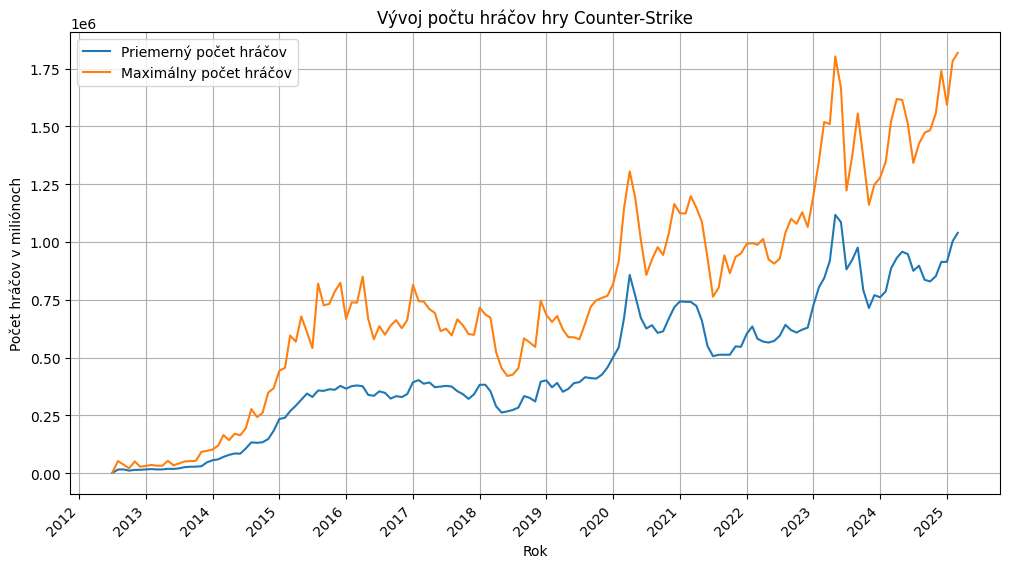

In [ ]:
if df_steamcharts is not None:

    df_steamcharts_copy = df_steamcharts.copy()

    # Úprava dát pre grafy
    df_steamcharts_copy = df_steamcharts_copy[df_steamcharts_copy["Month"] != "Last 30 Days"]
    df_steamcharts_copy["Month"] = pd.to_datetime(df_steamcharts_copy["Month"], format="%B %Y")
    df_steamcharts_copy = df_steamcharts_copy.set_index("Month")
    df_steamcharts_copy["Avg. Players"] = df_steamcharts_copy["Avg. Players"].str.replace(",", "").astype(float)
    df_steamcharts_copy["Peak Players"] = df_steamcharts_copy["Peak Players"].str.replace(",", "").astype(int)

    plt.figure(figsize=(12, 6))
    plt.plot(df_steamcharts_copy["Avg. Players"], label="Priemerný počet hráčov")
    plt.plot(df_steamcharts_copy["Peak Players"], label="Maximálny počet hráčov")
    plt.xlabel("Rok")
    plt.ylabel("Počet hráčov v miliónoch")
    plt.title("Vývoj počtu hráčov hry Counter-Strike")
    plt.legend()
    plt.grid(True)

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.xticks(rotation=45, ha="right")

    plt.show()

In [ ]:
if df_steamcharts is not None:

    df_steamcharts_copy2 = df_steamcharts.copy()

    df_steamcharts_copy2 = df_steamcharts_copy2[df_steamcharts_copy2["Month"] != "Last 30 Days"]
    df_steamcharts_copy2["Month"] = pd.to_datetime(df_steamcharts_copy2["Month"], format="%B %Y")
    df_steamcharts_copy2 = df_steamcharts_copy2.set_index("Month")
    df_steamcharts_copy2["Avg. Players"] = df_steamcharts_copy2["Avg. Players"].str.replace(",", "").astype(float)
    df_steamcharts_copy2["Peak Players"] = df_steamcharts_copy2["Peak Players"].str.replace(",", "").astype(int)

    # Ošetrenie "-" v stĺpci Gain
    df_steamcharts_copy2["Gain"] = df_steamcharts_copy2["Gain"].replace("-", pd.NA)
    # Konverzia na číselné hodnoty, nečíselné hodnoty nahradí NaN
    df_steamcharts_copy2["Gain"] = pd.to_numeric(df_steamcharts_copy2["Gain"], errors='coerce')

    # Nájdenie najväčšieho nárastu/poklesu priemerných hráčov
    najvacsi_narast_avg = df_steamcharts_copy2["Gain"].idxmax()
    najvacsi_pokles_avg = df_steamcharts_copy2["Gain"].idxmin()

    print("Najväčší nárast/pokles priemerných hráčov:")
    print(f"Najväčší nárast: {df_steamcharts_copy2.loc[najvacsi_narast_avg].name.strftime('%B %Y')} ({df_steamcharts_copy2.loc[najvacsi_narast_avg]['Gain']})")
    print(f"Najväčší pokles: {df_steamcharts_copy2.loc[najvacsi_pokles_avg].name.strftime('%B %Y')} ({df_steamcharts_copy2.loc[najvacsi_pokles_avg]['Gain']})")

    # Výpočet zmeny maximálneho počtu hráčov a nájdenie najväčšieho nárastu/poklesu
    df_steamcharts_copy2["Peak Players Change"] = df_steamcharts_copy2["Peak Players"].diff()
    najvacsi_narast_peak = df_steamcharts_copy2["Peak Players Change"].idxmax()
    najvacsi_pokles_peak = df_steamcharts_copy2["Peak Players Change"].idxmin()

    print("\nNajväčší nárast/pokles maximálnych hráčov:")
    print(f"Najväčší nárast: {df_steamcharts_copy2.loc[najvacsi_narast_peak].name.strftime('%B %Y')} ({df_steamcharts_copy2.loc[najvacsi_narast_peak]['Peak Players Change']})")
    print(f"Najväčší pokles: {df_steamcharts_copy2.loc[najvacsi_pokles_peak].name.strftime('%B %Y')} ({df_steamcharts_copy2.loc[najvacsi_pokles_peak]['Peak Players Change']})")

else:
    print("chyba")

Najväčší nárast/pokles priemerných hráčov:
Najväčší nárast: May 2023 (199431.8)
Najväčší pokles: July 2023 (-204275.9)

Najväčší nárast/pokles maximálnych hráčov:
Najväčší nárast: June 2023 (442956.0)
Najväčší pokles: April 2023 (-292622.0)


In [ ]:
if df_steamcharts is not None:

    df_steamcharts_copy3 = df_steamcharts.copy()

    df_steamcharts_copy3 = df_steamcharts_copy3[df_steamcharts_copy3["Month"] != "Last 30 Days"]
    df_steamcharts_copy3["Month"] = pd.to_datetime(df_steamcharts_copy3["Month"], format="%B %Y")
    df_steamcharts_copy3 = df_steamcharts_copy3.set_index("Month")
    df_steamcharts_copy3["Avg. Players"] = df_steamcharts_copy3["Avg. Players"].str.replace(",", "").astype(float)
    df_steamcharts_copy3["Peak Players"] = df_steamcharts_copy3["Peak Players"].str.replace(",", "").astype(int)

    # Odstránenie July 2012
    df_steamcharts_copy3 = df_steamcharts_copy3.drop(pd.to_datetime("July 2012", format="%B %Y"), errors='ignore')

    # Extrakcia mesiacov a rokov
    df_steamcharts_copy3["MonthName"] = df_steamcharts_copy3.index.month_name()

    # Agregácia dát podľa mesiacov
    monthly_avg = df_steamcharts_copy3.groupby("MonthName")["Avg. Players"].mean().reindex([
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ])
    monthly_peak = df_steamcharts_copy3.groupby("MonthName")["Peak Players"].mean().reindex([
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ])

    print("Priemerný počet hráčov podľa mesiacov:")
    print(monthly_avg)
    print("\nMaximálny počet hráčov podľa mesiacov:")
    print(monthly_peak)

Priemerný počet hráčov podľa mesiacov:
MonthName
January      468894.149231
February     489578.738462
March        509781.810000
April        482872.119167
May          485620.679167
June         469840.156667
July         444841.401667
August       428108.996923
September    423235.320769
October      407754.003846
November     411016.956923
December     441152.213077
Name: Avg. Players, dtype: float64

Maximálny počet hráčov podľa mesiacov:
MonthName
January      804927.230769
February     842726.846154
March        908984.230769
April        837016.166667
May          827338.250000
June         752728.083333
July         679768.416667
August       696909.461538
September    747190.615385
October      724563.538462
November     740855.230769
December     789091.615385
Name: Peak Players, dtype: float64


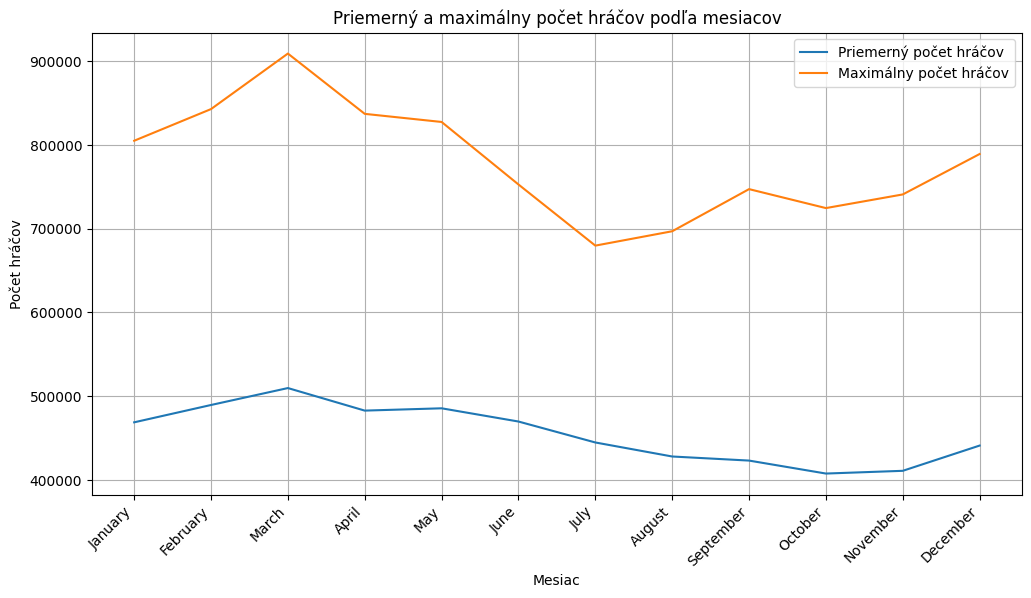

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, label="Priemerný počet hráčov")
plt.plot(monthly_peak.index, monthly_peak.values, label="Maximálny počet hráčov")
plt.xlabel("Mesiac")
plt.ylabel("Počet hráčov")
plt.title("Priemerný a maximálny počet hráčov podľa mesiacov")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()